<h1><strong>DASHBOARD: COVID - SP</strong></h1>

<h3>Importando bibliotecas necessárias</h3>

In [3]:
import dash
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt 
from dash import html, dcc
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<h3>Abrindo Datasets e transformando em DataFrames</h3>

In [4]:
estado_sp = pd.DataFrame(pd.read_csv("Dados-covid-19-estado.csv", delimiter = ";", encoding="latin1", low_memory = False))
municipios_sp = pd.DataFrame(pd.read_csv("Dados-covid-19-municipios.csv", delimiter = ";", encoding="latin1", low_memory = False))

preexistentes_0 = pd.DataFrame(pd.read_csv("parte_0.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_1 = pd.DataFrame(pd.read_csv("parte_1.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_2 = pd.DataFrame(pd.read_csv("parte_2.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_3 = pd.DataFrame(pd.read_csv("parte_3.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_4 = pd.DataFrame(pd.read_csv("parte_4.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_5 = pd.DataFrame(pd.read_csv("parte_5.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_6 = pd.DataFrame(pd.read_csv("parte_6.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_7 = pd.DataFrame(pd.read_csv("parte_7.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_8 = pd.DataFrame(pd.read_csv("parte_8.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_9 = pd.DataFrame(pd.read_csv("parte_9.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_10 = pd.DataFrame(pd.read_csv("parte_10.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_11 = pd.DataFrame(pd.read_csv("parte_11.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_12 = pd.DataFrame(pd.read_csv("parte_12.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_13 =pd.DataFrame(pd.read_csv("parte_13.csv", delimiter = ";", encoding="latin1", low_memory = False))
preexistentes_14 =pd.DataFrame(pd.read_csv("parte_14.csv", delimiter = ";", encoding="latin1", low_memory = False))

all_preexistentes = [preexistentes_0,preexistentes_1,preexistentes_2,preexistentes_3,preexistentes_4,preexistentes_5, preexistentes_6,preexistentes_7,preexistentes_8, preexistentes_9, preexistentes_10, preexistentes_11, preexistentes_12, preexistentes_13, preexistentes_14]
doencas_pre_existentes = pd.concat(all_preexistentes)


Dataframes disponiveis: <strong>Estado_sp</strong>, <strong>Municipios_sp</strong>, <strong>doencas_pre_existentes</strong>

<h2>Estrutura do dashboard</h2>

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
/Users/gustavo/Library/Python/3.11/lib/python/site-packages/traitlets/traitlets.py:2548: FutureWarning: Supporting extra quotes around strings is deprecated in traitlets 5.0. You can use 'hmac-sha256' instead of '"hmac-sha256"' if you require traitlets >=5.
  warn(
/Users/gustavo/Library/Python/3.11/lib/python/site-packages/traitlets/traitlets.py:2499: FutureWarning: Supporting extra quotes around Bytes is deprecated in traitlets 5.0. Use 'b76a4a7a-c124-423d-92a1-8542007d4115' instead of 'b"b76a4a7a-c124-423d-92a1-8542007d4115"'.
  warn(
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/U

SystemExit: 1

/Users/gustavo/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3516: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



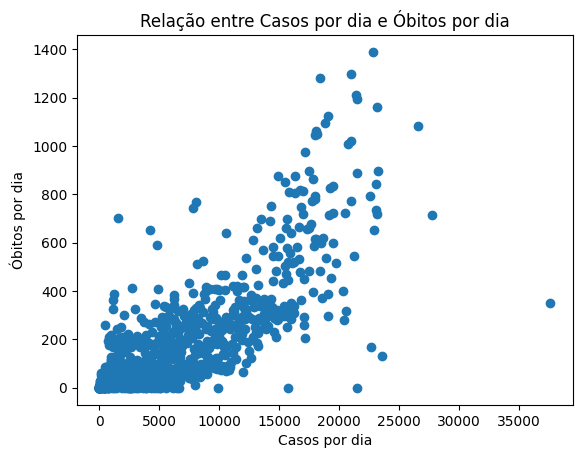

In [5]:
listadados = [estado_sp, municipios_sp, doencas_pre_existentes]
dados = pd.DataFrame(pd.concat(listadados))

relacao_casos_obitos = pd.read_csv('Dados-covid-19-estado.csv')

# Extrair as colunas de casos por dia e óbitos por dia
casos_por_dia = relacao_casos_obitos['Casos_por_dia']
obitos_por_dia = relacao_casos_obitos['obitos_por_dia']

# Criar um gráfico de dispersão
plt.scatter(casos_por_dia, obitos_por_dia)

# Adicionar rótulos e título ao gráfico
plt.xlabel('Casos por dia')
plt.ylabel('Óbitos por dia')
plt.title('Relação entre Casos por dia e Óbitos por dia')


# Carregar os dados do arquivo CSV
relacao_casos_obitos = pd.read_csv('Dados-covid-19-estado.csv')


# Extrair as colunas de casos por dia e óbitos por dia
casos_por_dia = relacao_casos_obitos['Casos_por_dia']
obitos_por_dia = relacao_casos_obitos['obitos_por_dia']







# Definir o layout do dashboard
app = dash.Dash(__name__)

app.layout = html.Div(
    children=[
        html.H1("Dashboard de COVID-19"),
        dcc.Graph(
            id="grafico-barras-agrupadas",
            figure=go.Figure(
                data=[
                    go.Bar(x=relacao_casos_obitos.index, y=casos_por_dia, name='Casos por dia'),
                    go.Bar(x=relacao_casos_obitos.index, y=obitos_por_dia, name='Óbitos por dia')
                ],
                layout=go.Layout(
                    title='Casos por dia e Óbitos por dia',
                    barmode='group'
                )
            )
        )
    ]
)

# Executar o dashboard
if __name__ == '__main__':
    app.run_server(debug=True)